# project Name- chromatic kidney disease diagnosis by using ML


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [2]:
#reading data
data=pd.read_csv("kidney_disease.csv")

In [101]:
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [102]:
data.shape
data.info

<bound method DataFrame.info of       id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  y

In [103]:
#chaking missing values
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [104]:
#finding unique\special value\characters present in data
for i in data.columns:
    print('Unique Values in "{}":\n'.format(i),data[i].unique(), "\n\n")
    

Unique Values in "id":
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 24

In [105]:
#replacing special\unique value\character by manual character\value
data[['pcv', 'wc', 'rc', 'dm', 'cad', 'classification']] = data[['pcv', 'wc', 'rc', 'dm', 'cad', 'classification']].replace(to_replace={'\t8400':'8400', '\t6200':'6200', '\t43':'43', '\t?':np.nan, '\tyes':'yes', '\tno':'no', 'ckd\t':'ckd', ' yes':'yes'})

In [106]:
#after replacing value chake shape and data types
data.head(3)
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [107]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [108]:
#missing value replace by mode

In [109]:
data.age = data.age.replace(np.NaN, data.age.mode()[0])
data.bp = data.bp.replace(np.NaN, data.bp.mode()[0])
data.sg = data.sg.replace(np.NaN, data.sg.mode()[0])

data.al = data.al.replace(np.NaN, data.al.mode()[0])
data.su = data.su.replace(np.NaN, data.su.mode()[0])
data.rbc = data.rbc.replace(np.NaN, data.rbc.mode()[0])

data.pc = data.pc.replace(np.NaN, data.pc.mode()[0])
data.pcc = data.pcc.replace(np.NaN, data.pcc.mode()[0])
data.ba = data.ba.replace(np.NaN, data.ba.mode()[0])

data.bgr = data.bgr.replace(np.NaN, data.bgr.mode()[0])
data.bu = data.bu.replace(np.NaN, data.bu.mode()[0])
data.sc = data.sc.replace(np.NaN, data.sc.mode()[0])

data.sod=data.sod.replace(np.NaN,data.sod.mode()[0])
data.pot = data.pot.replace(np.NaN, data.pot.mode()[0])
data.hemo = data.hemo.replace(np.NaN, data.hemo.mode()[0])
data.pcv = data.pcv.replace(np.NaN, data.pcv.mode()[0])

data.wc = data.wc.replace(np.NaN, data.wc.mode()[0])
data.rc = data.rc.replace(np.NaN, data.rc.mode()[0])
data.htn = data.htn.replace(np.NaN, data.htn.mode()[0])

data.dm = data.dm.replace(np.NaN, data.dm.mode()[0])
data.cad = data.cad.replace(np.NaN, data.cad.mode()[0])
data.appet = data.appet.replace(np.NaN, data.appet.mode()[0])

data.pe = data.pe.replace(np.NaN, data.pe.mode()[0])
data.ane = data.ane.replace(np.NaN, data.ane.mode()[0])
data.classification = data.classification.replace(np.NaN, data.classification.mode()[0])

In [110]:
#after applying mode chakeing missing values
data.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [111]:
#applying label encoder to convert string in int(character in numbers)
from sklearn.preprocessing import LabelEncoder

In [112]:
le=LabelEncoder()

In [113]:
data.loc[:,"rbc"]=le.fit_transform(data.loc[:,"rbc"])
data.loc[:,"pc"]=le.fit_transform(data.loc[:,"pc"])
data.loc[:,"pcc"]=le.fit_transform(data.loc[:,"pcc"])
data.loc[:,"ba"]=le.fit_transform(data.loc[:,"ba"])
data.loc[:,"htn"]=le.fit_transform(data.loc[:,"htn"])
data.loc[:,"dm"]=le.fit_transform(data.loc[:,"dm"])
data.loc[:,"cad"]=le.fit_transform(data.loc[:,"cad"])
data.loc[:,"appet"]=le.fit_transform(data.loc[:,"appet"])
data.loc[:,"pe"]=le.fit_transform(data.loc[:,"pe"])
data.loc[:,"ane"]=le.fit_transform(data.loc[:,"ane"])
data.loc[:,"classification"]=le.fit_transform(data.loc[:,"classification"])

In [114]:
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44,7800,5.2,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38,6000,5.2,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31,7500,5.2,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32,6700,3.9,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35,7300,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,47,6700,4.9,0,0,0,0,0,0,1
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,54,7800,6.2,0,0,0,0,0,0,1
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,49,6600,5.4,0,0,0,0,0,0,1
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,51,7200,5.9,0,0,0,0,0,0,1


In [115]:
data.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

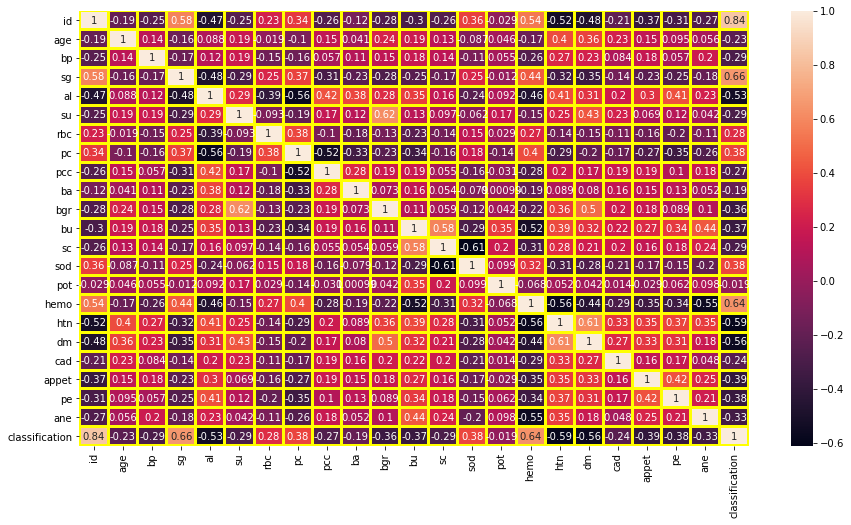

In [116]:
# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(data.corr(), annot = True, linewidths = 2, linecolor = 'yellow')
plt.show()

In [117]:
# define x&y by using iloc method
#x=always indipendant variables
#y=is dipendant variable

In [118]:
x=data.iloc[:,1:25]
x

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44,7800,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,99.0,...,11.3,38,6000,5.2,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31,7500,5.2,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32,6700,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35,7300,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,47,6700,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54,7800,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,49,6600,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,51,7200,5.9,0,0,0,0,0,0


In [119]:
y=data["classification"]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int32

In [120]:
y.shape

(400,)

In [121]:
data.shape
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [122]:
#scalling the data

In [123]:
from sklearn.preprocessing import scale
standardize_X = scale(x)
standardize_y = scale(y)

In [124]:
#normalising data
from sklearn.preprocessing import normalize
norx=normalize(x)

In [125]:
#train_test_split data

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)


In [128]:
y_train.shape

(320,)

# #DecisionTreeClassifier

In [129]:
# Decision Tree algorithm 
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
df=pd.DataFrame({"Actual":y_test,"predict":y_pred})
dtc=accuracy_score(y_test,y_pred)*100
dtc

96.25

# RandomForestClassifier

In [130]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
df = pd.DataFrame({"actual":y_test,"pred":y_pred})
df
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rfc=(accuracy_score(y_test,y_pred)*100)
rfc




100.0

# kmean algorithms 

In [131]:

#kmean algorithm 
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=17)
knc.fit(x_train,y_train)
y_pred=knc.predict(x_test)
df_k=pd.DataFrame({"Actual":y_test,"predict":y_test})
kms=(accuracy_score(y_test,y_pred)*100)
kms

65.0

# support vector machine

In [132]:
from sklearn.svm import SVC
svc=SVC(kernel="linear",random_state=0)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
df_s=pd.DataFrame({"Actual":y_test,"predict":y_test})
svm=(accuracy_score(y_test,y_pred)*100)
svm

96.25

In [133]:
name = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','support vector machine'],
    'Score' : [kms, dtc, rfc,svm]
})


#models.sort_values(by = 'Score', ascending = False)

In [134]:
name

,Model,Score
0,KNN,65.00
1,Decision Tree Classifier,96.25
2,Random Forest Classifier,100.00
3,support vector machine,96.25



 Accuracy score using Bar Graph:



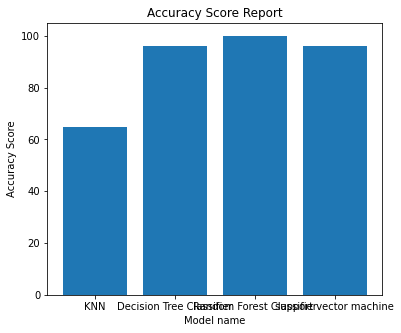

In [135]:
df=pd.DataFrame(name)
print("\n Accuracy score using Bar Graph:\n")
x=df["Model"]
y=df["Score"]
plt.figure(figsize=(6,5))
plt.bar(x,y,align='center')
plt.title('Accuracy Score Report')  
plt.xlabel('Model name')  
plt.ylabel('Accuracy Score')  
plt.show()  



 	 Accuracy score show using Seaborn.barplot:



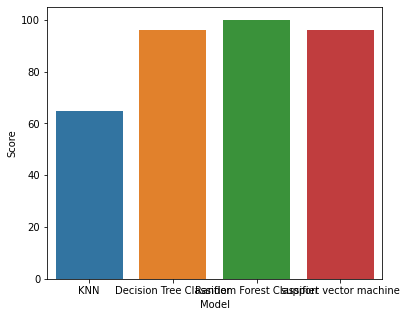

In [136]:
print("\n \t Accuracy score show using Seaborn.barplot:\n")  
plt.figure(figsize=(6,5))
sns.barplot(x="Model",y="Score",data=df)
plt.show()